### 결정 트리 기본 코드

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
accuracy_train = dt.score(X_train, y_train)
accuracy_test = dt.score(X_test, y_test)
print("Train dataset 정확도: ", accuracy_train) # 과적합이 되어 학습 데이터셋에 대해서는 100% 정답
print("Test dataset 정확도: {0:.3f}".format(accuracy_test)) # 테스트 데이터셋은 92%의 정답률

Train dataset 정확도:  1.0
Test dataset 정확도: 0.916


**트리 깊이 제한**

In [5]:
dt_limit = DecisionTreeClassifier(max_depth=4, random_state=0)
dt_limit.fit(X_train, y_train)

print("Train dataset 정확도: {0:.3f}".format(dt_limit.score(X_train, y_train))) 
print("Test dataset 정확도: {0:.3f}".format(dt_limit.score(X_test, y_test)))

Train dataset 정확도: 0.988
Test dataset 정확도: 0.951


### graphviz를 이용하여 시각화

### 특성 중요도 (feature importance)

In [7]:
print("특성 중요도 \n", dt_limit.feature_importances_)

특성 중요도 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


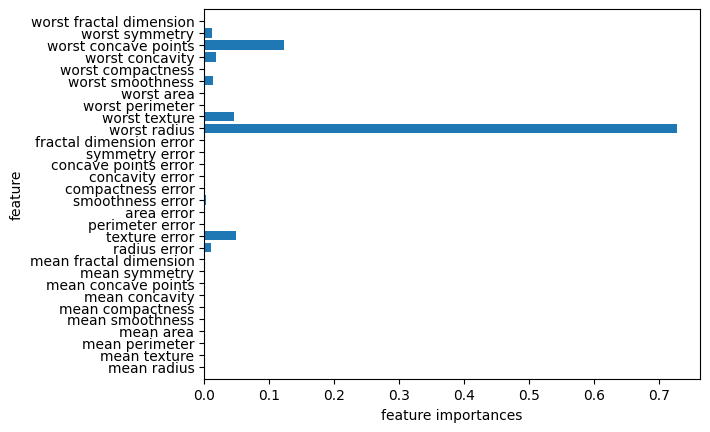

In [8]:
# feature importance 시각화하기
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(dt_limit)

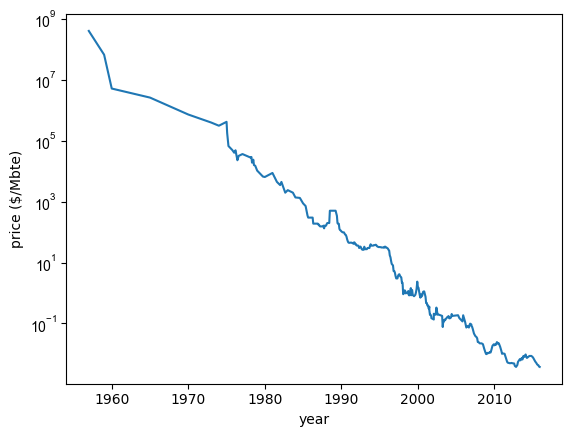

In [8]:
import os
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname= "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price ($/Mbte)")
plt.show()

### DecisionTreeRegressor 성능 비교

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꾸기
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌리기
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

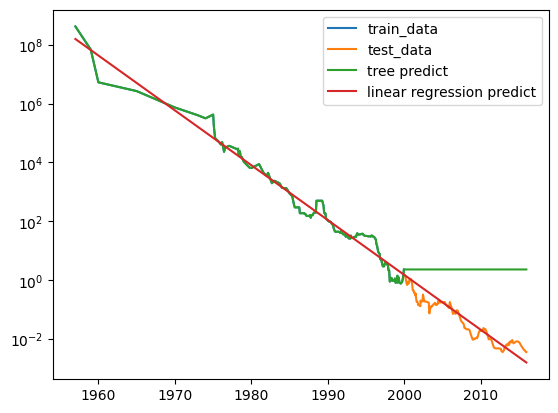

In [10]:
plt.semilogy(data_train.date, data_train.price, label="train_data")
plt.semilogy(data_test.date, data_test.price, label="test_data")
plt.semilogy(ram_prices.date, price_tree, label="tree predict")
plt.semilogy(ram_prices.date, price_lr, label="linear regression predict")
plt.legend()

[결론]
tree 모델은 train data에 정확하게 일치하게끔 예측을 하는데 test data에 대해서는 전혀 예측을 못한다.  
linear regression은 경향성이 있게 일반화를 시켰지만 tree 모델은 과적합이 된 것을 알 수 있다.